In [20]:
from glob import glob

In [21]:
path='/content/drive/MyDrive/images'
image=glob(path+'/*')
image

['/content/drive/MyDrive/images/Rismi',
 '/content/drive/MyDrive/images/Thushin',
 '/content/drive/MyDrive/images/Sayuj',
 '/content/drive/MyDrive/images/Shamiya',
 '/content/drive/MyDrive/images/Sadeed']

In [22]:
rismi=list(glob(path+'/Rismi/*'))
thushin=list(glob(path+'/Thushin/*'))
sayuj=list(glob(path+'/Sayuj/*'))
shamiya=list(glob(path+'/Shamiya/*'))
sadeed=list(glob(path+'/Sadeed/*'))

In [4]:
len(rismi)

300

In [23]:
input={'Rismi':rismi, 'Thushin':thushin, 'Sayuj':sayuj, 'Shamiya':shamiya, 'Sadeed':sadeed}
output={'Rismi':0, 'Thushin':1, 'Sayuj':2, 'Shamiya':3, 'Sadeed':4}

In [24]:
x=[]
y=[]
import cv2
import numpy as np
for img in input:
  path_list=input[img]
  for path in path_list:
    img_array=cv2.imread(path)
    img_resize=cv2.resize(img_array,(224,224))
    img_resize=img_resize/255
    img_resize=img_resize.reshape(224,224,3,1)
    x.append(img_resize)
    y.append(output[img])
    x1=np.array(x)
    y1=np.array(y)

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.2)

In [26]:
from tensorflow.keras.layers import Flatten,Dense,Conv3D,MaxPool3D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
mod=Sequential()

In [27]:
xtrain.shape
xtest.shape

(300, 224, 224, 3, 1)

In [28]:
mod.add(Conv3D(filters=20,kernel_size=(2,2,3),input_shape=(224,224,3,1)))
mod.add(MaxPool3D(pool_size=(2,2,1)))
mod.add(Conv3D(filters=10,kernel_size=(2,2,1),activation='relu'))
mod.add(MaxPool3D(pool_size=(2,2,1)))


mod.add(Flatten())
mod.add(Dense(units=10,activation='relu'))
mod.add(Dense(units=5,activation='softmax'))

In [29]:
mod.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_2 (Conv3D)           (None, 223, 223, 1, 20)   260       
                                                                 
 max_pooling3d_2 (MaxPoolin  (None, 111, 111, 1, 20)   0         
 g3D)                                                            
                                                                 
 conv3d_3 (Conv3D)           (None, 110, 110, 1, 10)   810       
                                                                 
 max_pooling3d_3 (MaxPoolin  (None, 55, 55, 1, 10)     0         
 g3D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 30250)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [30]:
mod.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(),metrics=['accuracy'])

In [31]:
h=mod.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
38/38 [==============================] - 9s 121ms/step - loss: 1.1673 - accuracy: 0.5400 - val_loss: 0.9361 - val_accuracy: 0.6200
Epoch 2/10
38/38 [==============================] - 2s 43ms/step - loss: 0.9304 - accuracy: 0.5983 - val_loss: 0.8806 - val_accuracy: 0.6100
Epoch 3/10
38/38 [==============================] - 2s 43ms/step - loss: 0.8573 - accuracy: 0.6317 - val_loss: 0.7792 - val_accuracy: 0.8033
Epoch 4/10
38/38 [==============================] - 2s 42ms/step - loss: 0.6889 - accuracy: 0.7975 - val_loss: 0.6014 - val_accuracy: 0.8033
Epoch 5/10
38/38 [==============================] - 2s 47ms/step - loss: 0.5960 - accuracy: 0.7983 - val_loss: 0.5817 - val_accuracy: 0.8033
Epoch 6/10
38/38 [==============================] - 2s 43ms/step - loss: 0.5812 - accuracy: 0.7992 - val_loss: 0.5684 - val_accuracy: 0.8033
Epoch 7/10
38/38 [==============================] - 2s 44ms/step - loss: 0.5683 - accuracy: 0.7992 - val_loss: 0.5562 - val_accuracy: 0.8033
Epoch 8/10
3

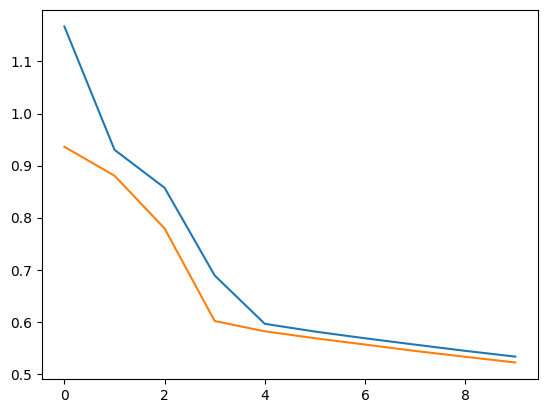

In [32]:
import matplotlib.pyplot as plt
loss=h.history['loss']
val_loss=h.history['val_loss']
epoch=h.epoch
plt.plot(epoch,loss)
plt.plot(epoch,val_loss)

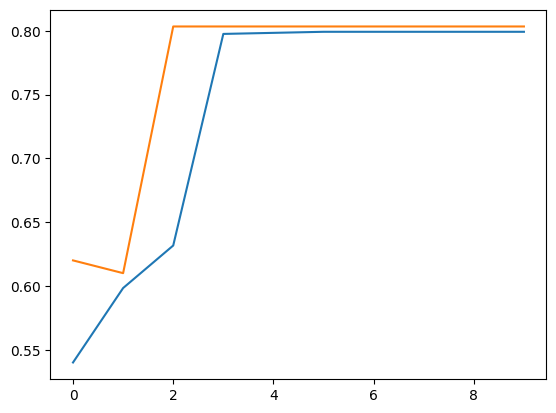

In [33]:
accuracy=h.history['accuracy']
val_accuracy=h.history['val_accuracy']
plt.plot(epoch,accuracy)
plt.plot(epoch,val_accuracy)

In [34]:
classes=['Rismi','Thushin','Sayuj','Shamiya','Sadeed']

In [60]:
from PIL import Image
import numpy as np
img='/content/drive/MyDrive/images/Shamiya/image_100.jpg'
dataset=[]
img=Image.open(img)
img=img.resize((224,224))
np.max(img)
img=np.array(img)/255
img=img.reshape(224,224,3,1)
dataset.append(img)
test=np.array(dataset)
m=mod.predict(test)
pred=np.argmax(m)
classes[pred]


1/1 [==============================] - 0s 18ms/step


'Shamiya'

In [43]:
mod.save('facedetection.h5')

In [13]:
from tensorflow.keras.models import load_model
data=load_model('facedetection.h5')